# Exp 2: Image Intensity Transformations and Spatial Filtering #
## 1.	Aims ##

#### 1. Learn the method of contrast adjustment and histogram equalization.

#### 2. Learn how to display histograms of images.
    
#### 3. Learn how to perform spatial filtering.

## 2.	Steps and Requirements

### (1) Perform Contrast Adjustment.	
(a) Load the image 'beans.png'. 

(b) Stretch its graysacle to the range of [0,1]. (Tips: ``skimage.exposure.rescale_intensity``) 

(c) Shrink its grayscale to the range of [0.2,0.8]. (Tips: ``skimage.exposure.rescale_intensity``) 

(d) Obtain the negative image. (Tips: ``skimage.exposure.rescale_intensity``) 

(e) Perform log transformation. (Tips: ``skimage.exposure.adjust_log``)  

(f) Perform Gamma transformation with $\gamma=0.5$ and $\gamma=1.5$, respectively. (Tips: ``skimage.exposure.adjust_gamma``) 

Display the images with suitable titles. 

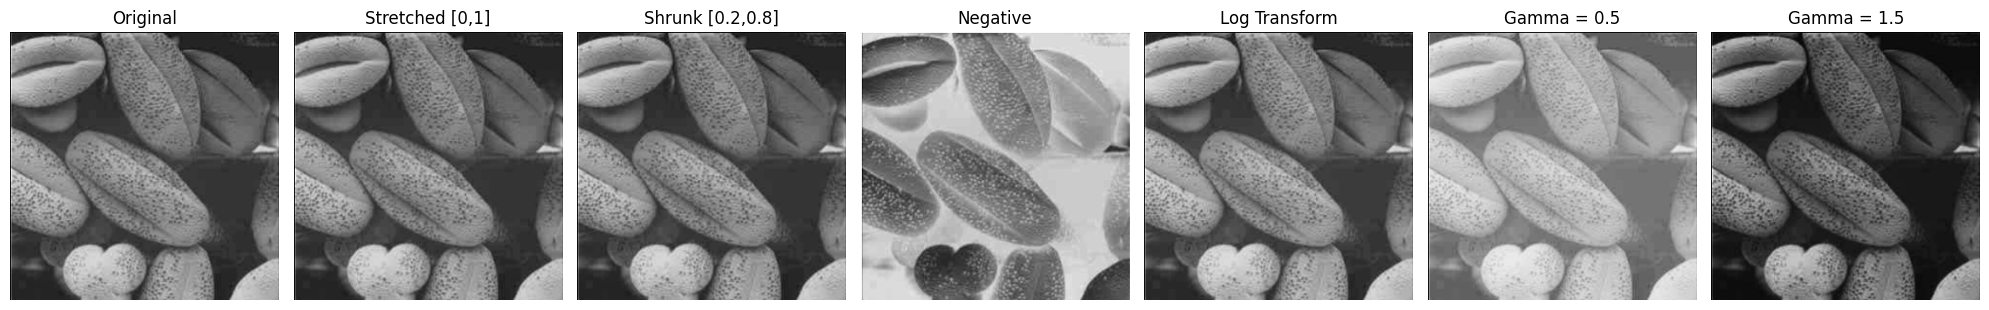

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, img_as_float

# Load the image
image = io.imread('beans.png', as_gray=True)  # Load as grayscale
image = img_as_float(image)  # Convert to float [0,1] range

# Create a single figure with subplots arranged horizontally
plt.figure(figsize=(20, 4))  # Width: 20, Height: 4 for horizontal layout

# (a) Original Image
plt.subplot(1, 7, 1)  # 1 row, 7 columns, position 1
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

# (b) Stretch grayscale to [0,1]
stretched = exposure.rescale_intensity(image, in_range=(image.min(), image.max()), out_range=(0, 1))
plt.subplot(1, 7, 2)  # Position 2
plt.imshow(stretched, cmap='gray')
plt.title('Stretched [0,1]')
plt.axis('off')

# (c) Shrink grayscale to [0.2,0.8]
shrunk = exposure.rescale_intensity(image, in_range=(image.min(), image.max()), out_range=(0.2, 0.8))
plt.subplot(1, 7, 3)  # Position 3
plt.imshow(shrunk, cmap='gray')
plt.title('Shrunk [0.2,0.8]')
plt.axis('off')

# (d) Negative image
negative = exposure.rescale_intensity(1 - image, in_range=(0, 1), out_range=(0, 1))
plt.subplot(1, 7, 4)  # Position 4
plt.imshow(negative, cmap='gray')
plt.title('Negative')
plt.axis('off')

# (e) Log transformation
log_transformed = exposure.adjust_log(image)
plt.subplot(1, 7, 5)  # Position 5
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transform')
plt.axis('off')

# (f) Gamma transformation with γ=0.5
gamma_05 = exposure.adjust_gamma(image, gamma=0.5)
plt.subplot(1, 7, 6)  # Position 6
plt.imshow(gamma_05, cmap='gray')
plt.title('Gamma = 0.5')
plt.axis('off')

# (f) Gamma transformation with γ=1.5
gamma_15 = exposure.adjust_gamma(image, gamma=1.5)
plt.subplot(1, 7, 7)  # Position 7
plt.imshow(gamma_15, cmap='gray')
plt.title('Gamma = 1.5')
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()


### (2) Compute and Display Image Histogram.	
(a) Compute the histogram of the original image and the histograms of the adjusted images above.
(<font style="color:red;"> Tips:``Matplotlib.pyplot.hist``or ``skimage.exposure.histogram(image, nbins=256)``</font>) 

(b) Display the histogram of the original image and the histograms of the adjusted images above. Use a suitlabe title for each figure.


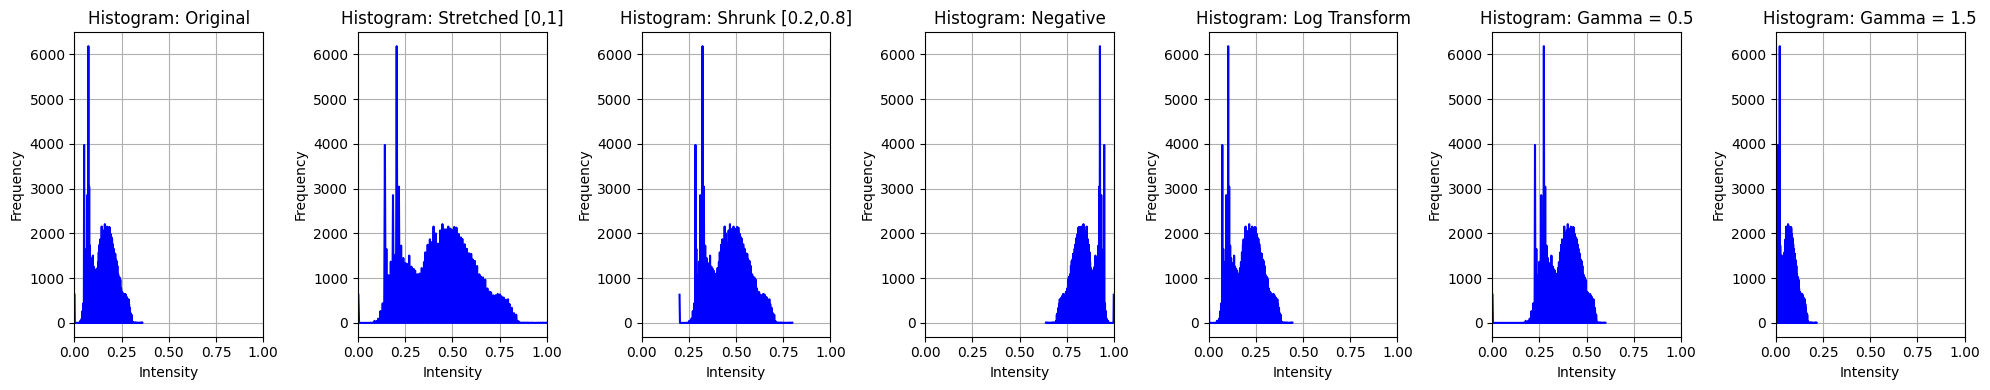

In [9]:
# Load the image
image = io.imread('beans.png', as_gray=True)  # Load as grayscale
image = img_as_float(image)  # Convert to float [0,1] range

# Perform all transformations
stretched = exposure.rescale_intensity(image, in_range=(image.min(), image.max()), out_range=(0, 1))
shrunk = exposure.rescale_intensity(image, in_range=(image.min(), image.max()), out_range=(0.2, 0.8))
negative = exposure.rescale_intensity(1 - image, in_range=(0, 1), out_range=(0, 1))
log_transformed = exposure.adjust_log(image)
gamma_05 = exposure.adjust_gamma(image, gamma=0.5)
gamma_15 = exposure.adjust_gamma(image, gamma=1.5)

# List of images and their titles
images = [image, stretched, shrunk, negative, log_transformed, gamma_05, gamma_15]
titles = ['Original', 'Stretched [0,1]', 'Shrunk [0.2,0.8]', 'Negative', 
          'Log Transform', 'Gamma = 0.5', 'Gamma = 1.5']

# Create figure for histograms
plt.figure(figsize=(20, 4))  # Wide figure for horizontal arrangement

# Compute and plot histogram for each image
for i, (img, title) in enumerate(zip(images, titles), 1):
    # Compute histogram
    hist, bins = exposure.histogram(img, nbins=256)
    
    # Plot histogram
    plt.subplot(1, 7, i)  # 1 row, 7 columns
    plt.plot(bins, hist, 'b-')  # Blue line plot
    plt.title(f'Histogram: {title}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.xlim([0, 1])  # Set x-axis range to [0,1] for consistency

# Adjust layout and display
plt.tight_layout()
plt.show()

### (3) Image Histogram Equalization 	
(a) Load the image 'beans.png'.  

(b) Perform histogram equalization of the image. (Tips: ``skimage.exposure.equalize_hist``) 

(c) Display the original image, the equalized image, the histogram of the original image, and the equalized image.  

(d) Answer the question: What are their differences?


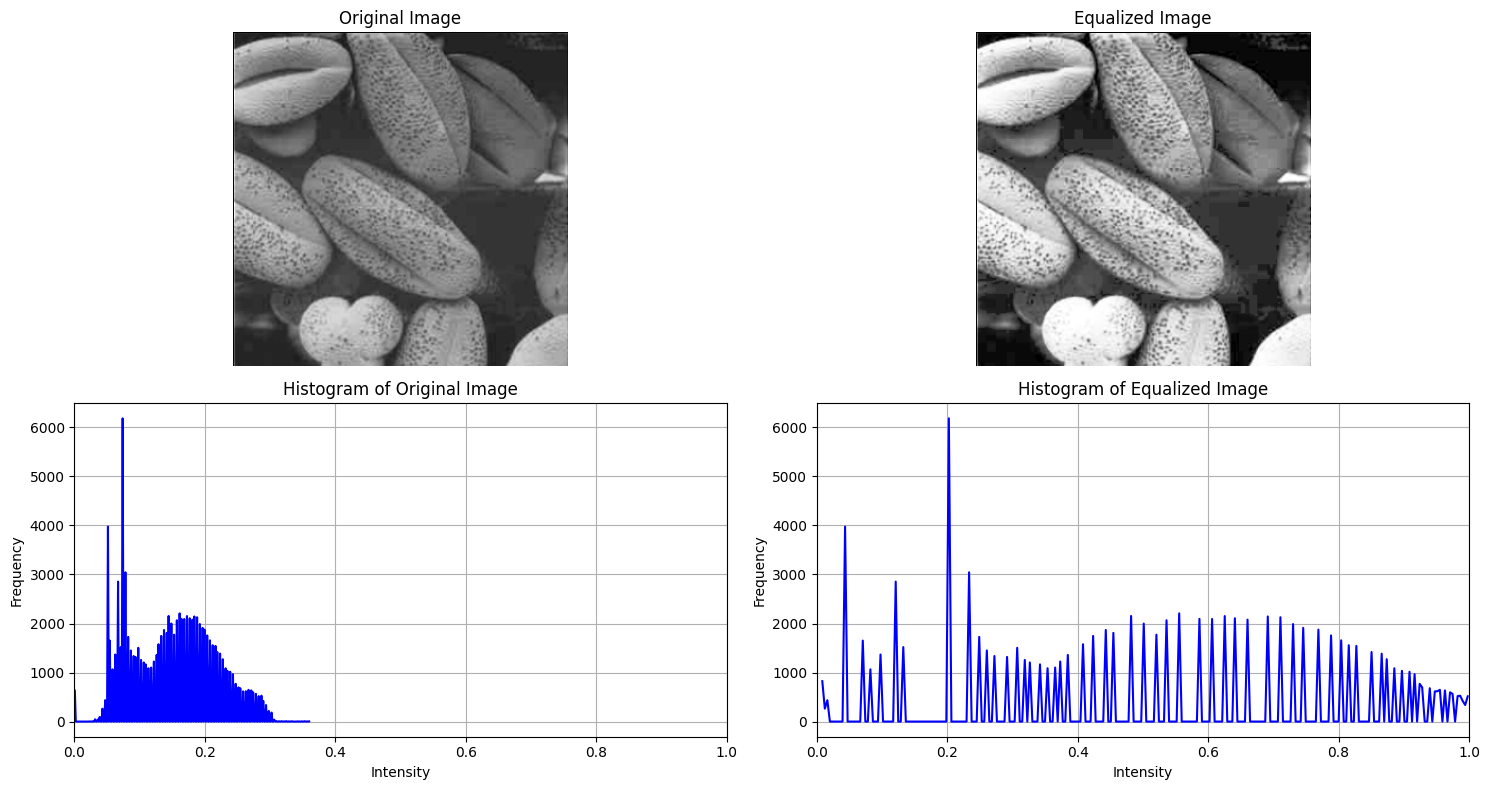

In [10]:
# (a) Load the image
image = io.imread('beans.png', as_gray=True)  # Load as grayscale
image = img_as_float(image)  # Convert to float [0,1] range

# (b) Perform histogram equalization
equalized = exposure.equalize_hist(image)

# (c) Display images and histograms
plt.figure(figsize=(15, 8))  # Create a figure with suitable size

# Original image
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, position 1
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(2, 2, 2)  # Position 2
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Histogram of original image
plt.subplot(2, 2, 3)  # Position 3
hist_orig, bins_orig = exposure.histogram(image, nbins=256)
plt.plot(bins_orig, hist_orig, 'b-')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim([0, 1])

# Histogram of equalized image
plt.subplot(2, 2, 4)  # Position 4
hist_eq, bins_eq = exposure.histogram(equalized, nbins=256)
plt.plot(bins_eq, hist_eq, 'b-')
plt.title('Histogram of Equalized Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim([0, 1])

# Adjust layout and display
plt.tight_layout()
plt.show()

### (4) Smoothing Linear Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt&Pepper noise with different intensities (at least 3 kinds). (Tips: ``skimage.util.random_noise``) 

(c) Perform smoothing linear filtering to smooth these noised images respectively. (Tips: ``ImageFilter.BLUR``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.

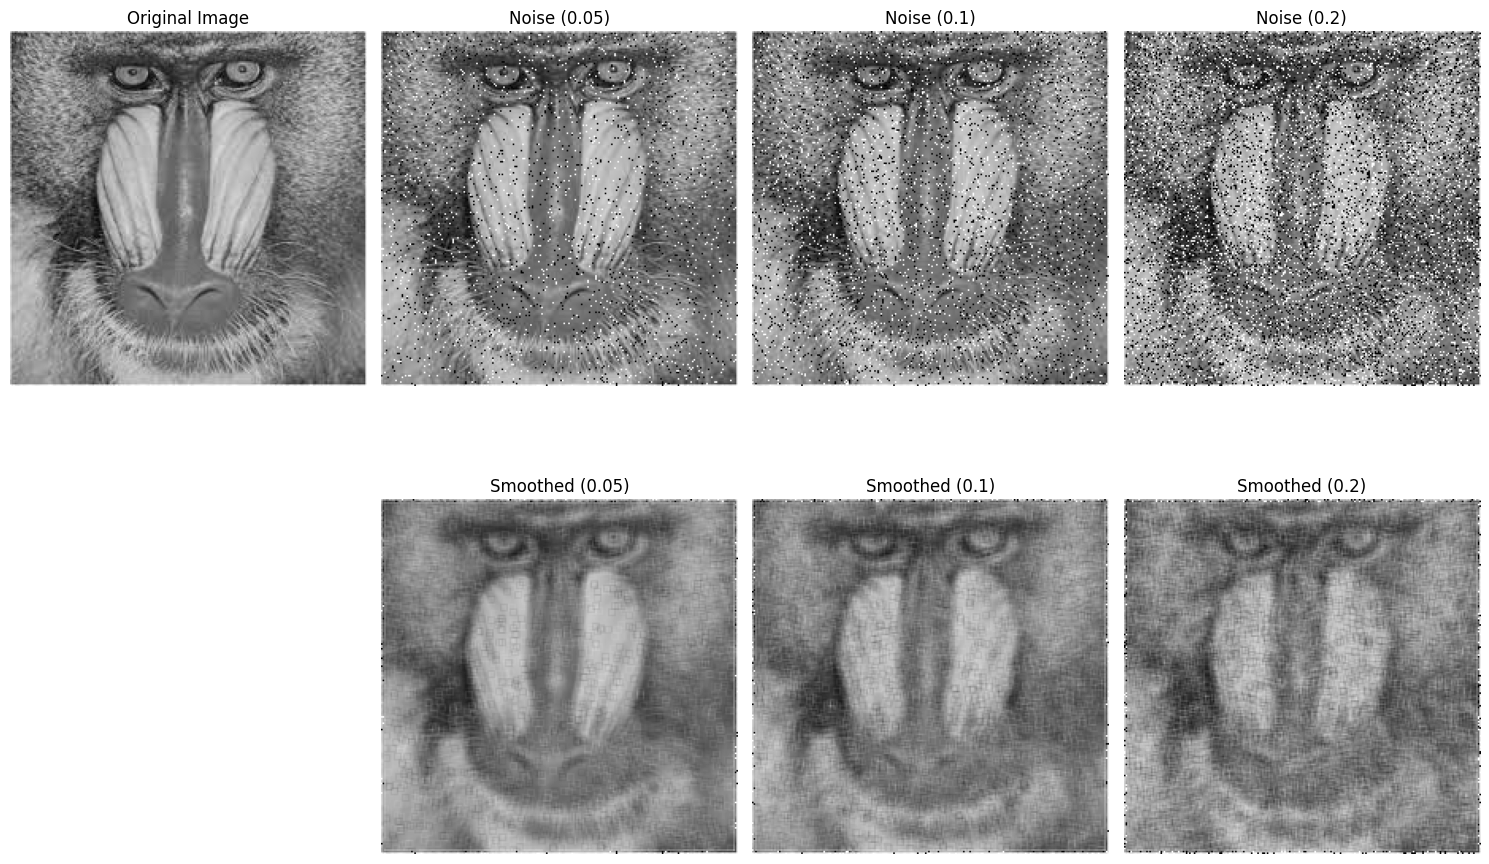

In [11]:
from skimage import io, util
from PIL import Image, ImageFilter

# (a) Load the image
image = io.imread('mandrill.jpg', as_gray=True)  # Load as grayscale
image_pil = Image.fromarray((image * 255).astype(np.uint8))  # Convert to PIL format

# (b) Add salt & pepper noise with different intensities
noise_005 = util.random_noise(image, mode='s&p', amount=0.05)  # Low noise
noise_01 = util.random_noise(image, mode='s&p', amount=0.1)   # Medium noise
noise_02 = util.random_noise(image, mode='s&p', amount=0.2)   # High noise

# Convert noisy images to PIL format for filtering
noise_005_pil = Image.fromarray((noise_005 * 255).astype(np.uint8))
noise_01_pil = Image.fromarray((noise_01 * 255).astype(np.uint8))
noise_02_pil = Image.fromarray((noise_02 * 255).astype(np.uint8))

# (c) Perform smoothing linear filtering (BLUR)
smoothed_005 = noise_005_pil.filter(ImageFilter.BLUR)
smoothed_01 = noise_01_pil.filter(ImageFilter.BLUR)
smoothed_02 = noise_02_pil.filter(ImageFilter.BLUR)

# (d) Display all images in one figure
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy images
plt.subplot(2, 4, 2)
plt.imshow(noise_005, cmap='gray')
plt.title('Noise (0.05)')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(noise_01, cmap='gray')
plt.title('Noise (0.1)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(noise_02, cmap='gray')
plt.title('Noise (0.2)')
plt.axis('off')

# Smoothed images
plt.subplot(2, 4, 6)
plt.imshow(smoothed_005, cmap='gray')
plt.title('Smoothed (0.05)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(smoothed_01, cmap='gray')
plt.title('Smoothed (0.1)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(smoothed_02, cmap='gray')
plt.title('Smoothed (0.2)')
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

### (5) Gaussian Smoothing Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add Gaussian noise to image. (Tips: ``skimage.util.random_noise``) 

(c) Perform Gaussian Smoothing Filtering to smooth the noised image. Select kernels with different radius values (at least 3 kinds). (Tips: ``ImageFilter. GaussianBlur``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.

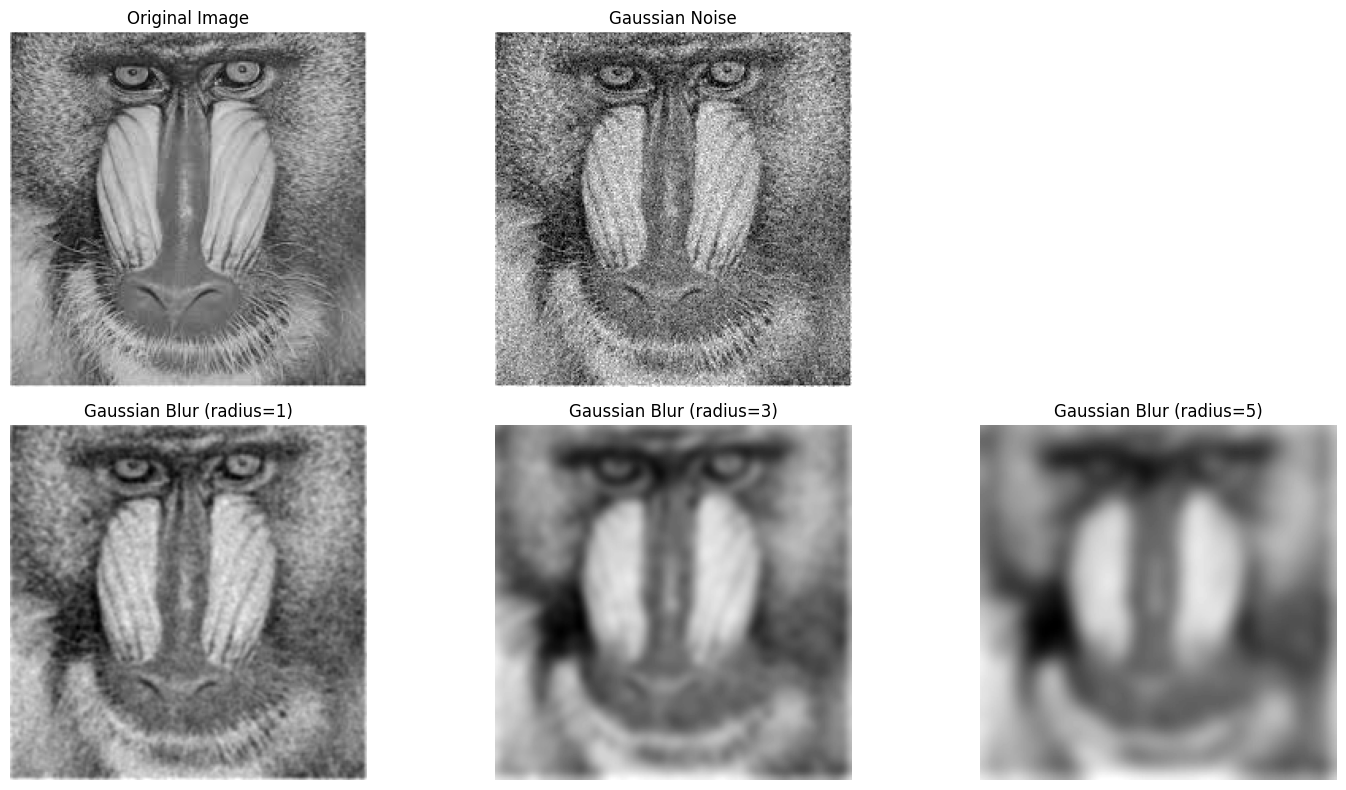

In [12]:
# (a) Load the image
image = io.imread('mandrill.jpg', as_gray=True)  # Load as grayscale
image_pil = Image.fromarray((image * 255).astype(np.uint8))  # Convert to PIL format

# (b) Add Gaussian noise
noisy = util.random_noise(image, mode='gaussian', mean=0, var=0.01)  # Gaussian noise with variance 0.01
noisy_pil = Image.fromarray((noisy * 255).astype(np.uint8))  # Convert to PIL format

# (c) Perform Gaussian smoothing with different radius values
smoothed_r1 = noisy_pil.filter(ImageFilter.GaussianBlur(radius=1))  # Small kernel
smoothed_r3 = noisy_pil.filter(ImageFilter.GaussianBlur(radius=3))  # Medium kernel
smoothed_r5 = noisy_pil.filter(ImageFilter.GaussianBlur(radius=5))  # Large kernel

# (d) Display all images in one figure
plt.figure(figsize=(15, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy image
plt.subplot(2, 3, 2)
plt.imshow(noisy, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

# Smoothed image with radius 1
plt.subplot(2, 3, 4)
plt.imshow(smoothed_r1, cmap='gray')
plt.title('Gaussian Blur (radius=1)')
plt.axis('off')

# Smoothed image with radius 3
plt.subplot(2, 3, 5)
plt.imshow(smoothed_r3, cmap='gray')
plt.title('Gaussian Blur (radius=3)')
plt.axis('off')

# Smoothed image with radius 5
plt.subplot(2, 3, 6)
plt.imshow(smoothed_r5, cmap='gray')
plt.title('Gaussian Blur (radius=5)')
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

### (6) Median Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt&Pepper noise with different intensities (at least 3 kinds). (Tips: ``skimage.util.random_noise``) 

(c) Perform median filtering to smooth these noised images respectively. Select kernels with different radius parameter values (at least 3 kinds). (Tips: ``ImageFilter.MedianFilter``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

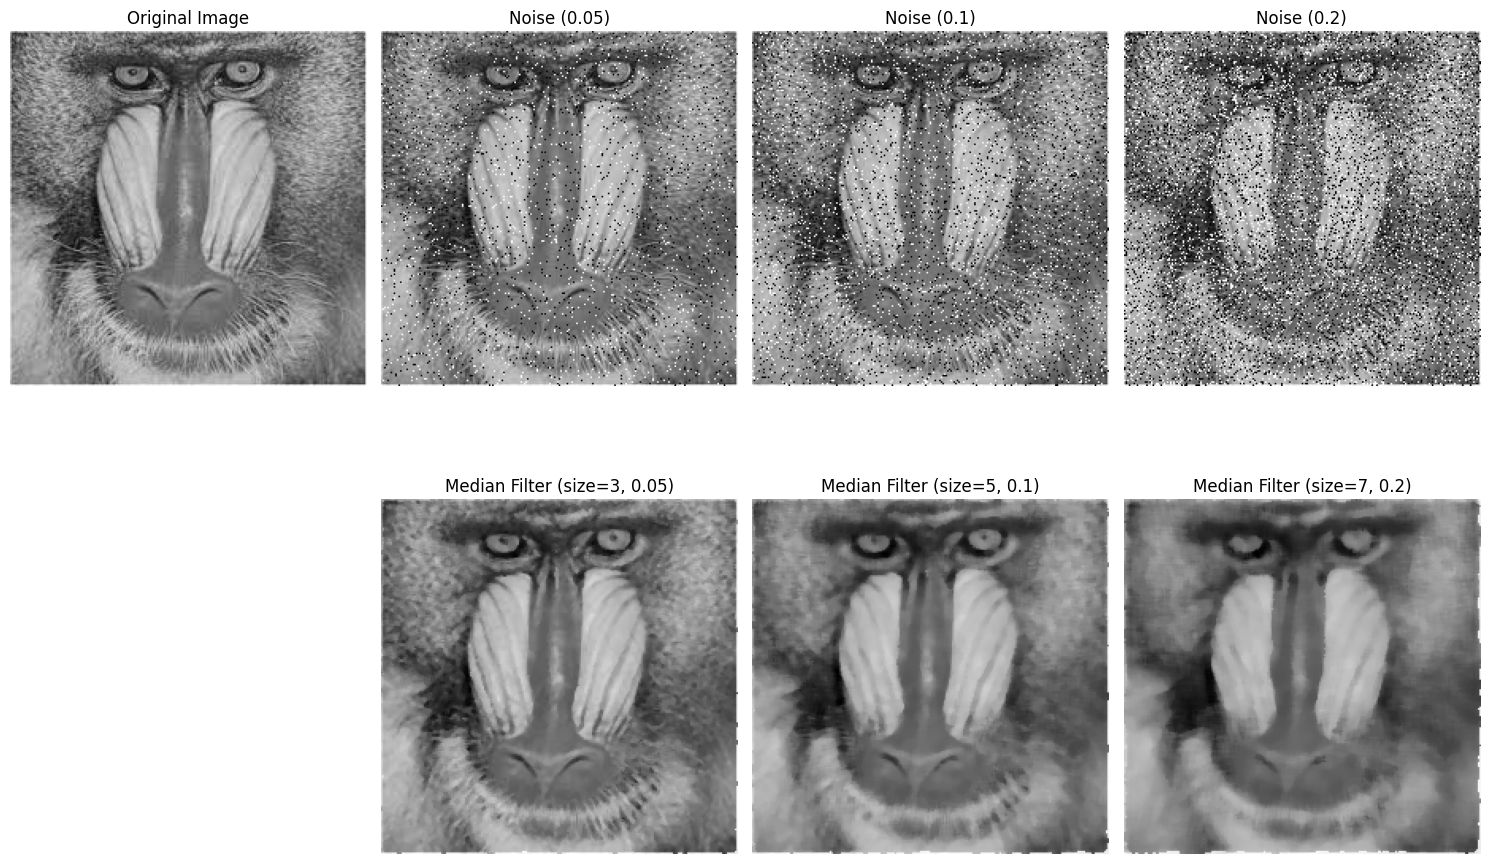

In [13]:
# (a) Load the image
image = io.imread('mandrill.jpg', as_gray=True)  # Load as grayscale
image_pil = Image.fromarray((image * 255).astype(np.uint8))  # Convert to PIL format

# (b) Add salt & pepper noise with different intensities
noise_005 = util.random_noise(image, mode='s&p', amount=0.05)  # Low noise
noise_01 = util.random_noise(image, mode='s&p', amount=0.1)   # Medium noise
noise_02 = util.random_noise(image, mode='s&p', amount=0.2)   # High noise

# Convert noisy images to PIL format
noise_005_pil = Image.fromarray((noise_005 * 255).astype(np.uint8))
noise_01_pil = Image.fromarray((noise_01 * 255).astype(np.uint8))
noise_02_pil = Image.fromarray((noise_02 * 255).astype(np.uint8))

# (c) Perform median filtering with different kernel sizes
# Note: MedianFilter size must be odd (3, 5, 7, etc.)
median_005_s3 = noise_005_pil.filter(ImageFilter.MedianFilter(size=3))  # Small kernel
median_01_s5 = noise_01_pil.filter(ImageFilter.MedianFilter(size=5))    # Medium kernel
median_02_s7 = noise_02_pil.filter(ImageFilter.MedianFilter(size=7))    # Large kernel

# (d) Display all images in one figure
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Noisy images
plt.subplot(2, 4, 2)
plt.imshow(noise_005, cmap='gray')
plt.title('Noise (0.05)')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(noise_01, cmap='gray')
plt.title('Noise (0.1)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(noise_02, cmap='gray')
plt.title('Noise (0.2)')
plt.axis('off')

# Median filtered images
plt.subplot(2, 4, 6)
plt.imshow(median_005_s3, cmap='gray')
plt.title('Median Filter (size=3, 0.05)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(median_01_s5, cmap='gray')
plt.title('Median Filter (size=5, 0.1)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(median_02_s7, cmap='gray')
plt.title('Median Filter (size=7, 0.2)')
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

### (7)	 Sharpening Filtering.	 
(a) Load the image 'lena.jpg', convert it to grayscale. 

(b) Perform sharpening spatial filtering to enhance the image with different parameters (at least 3 kinds). (Tips: ``skimage.filters.laplace``)

(c) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

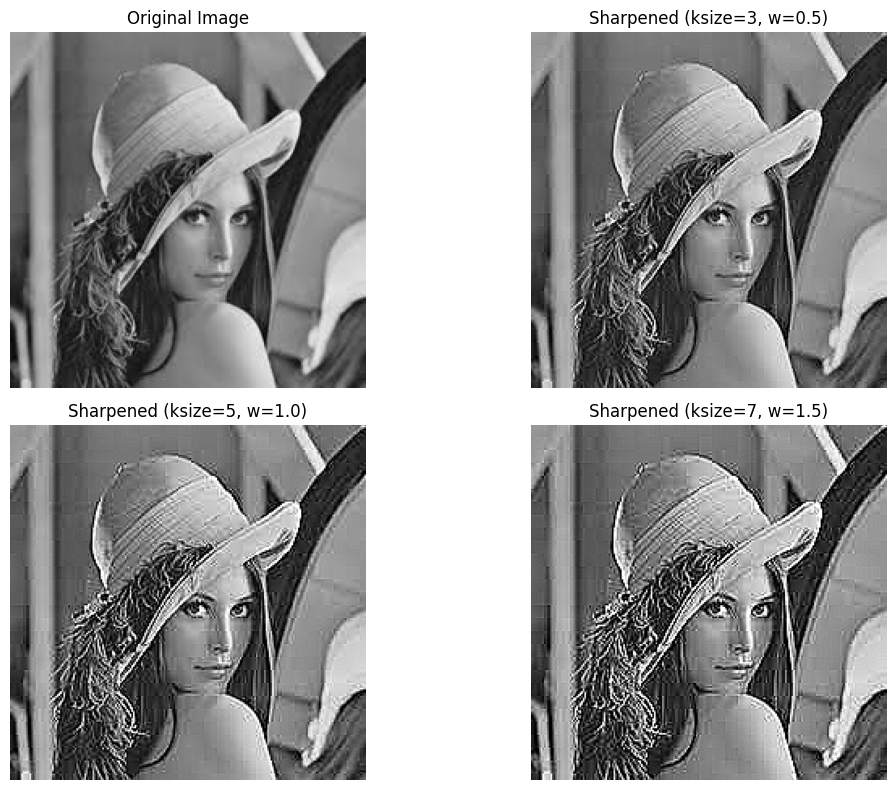

In [14]:
from skimage import io, filters

# (a) Load the image and convert to grayscale
image = io.imread('lena.jpg', as_gray=True)  # Load as grayscale

# (b) Perform sharpening with Laplacian filter using different kernel sizes
# Laplacian filter enhances edges; we add it back to the original with different weights
sharpened_1 = image + 0.5 * filters.laplace(image, ksize=3)  # Small kernel, light sharpening
sharpened_2 = image + 1.0 * filters.laplace(image, ksize=5)  # Medium kernel, moderate sharpening
sharpened_3 = image + 1.5 * filters.laplace(image, ksize=7)  # Large kernel, strong sharpening

# Clip values to [0,1] range to avoid overflow artifacts
sharpened_1 = np.clip(sharpened_1, 0, 1)
sharpened_2 = np.clip(sharpened_2, 0, 1)
sharpened_3 = np.clip(sharpened_3, 0, 1)

# (c) Display all images in one figure
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sharpened image with ksize=3, weight=0.5
plt.subplot(2, 2, 2)
plt.imshow(sharpened_1, cmap='gray')
plt.title('Sharpened (ksize=3, w=0.5)')
plt.axis('off')

# Sharpened image with ksize=5, weight=1.0
plt.subplot(2, 2, 3)
plt.imshow(sharpened_2, cmap='gray')
plt.title('Sharpened (ksize=5, w=1.0)')
plt.axis('off')

# Sharpened image with ksize=7, weight=1.5
plt.subplot(2, 2, 4)
plt.imshow(sharpened_3, cmap='gray')
plt.title('Sharpened (ksize=7, w=1.5)')
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

### (8)	Face Detection and Processing with OpenCV. (``Bonus Practice``)
Load the image 'exp2_7.jpg'. 

(a) The face region is detected and marked with a <font style="color:green;">green</font></center> rectangle.(Tips: You may use``cv2.CascadeClassifier``, or ``cv2.dnn.readNetFromCaffe``, or [``MTCNN``](https://github.com/timesler/facenet-pytorch))

(b) Perform Gaussian smoothing filtering for the background region. Some examples of the generated results are shown in the figure below.
 
![result1](./images/Figure 1. The result of cv2.CascadeClassifier.png) 
<center><font style="color:red;">** Figure 1. The result of cv2.CascadeClassifier ** </font></center>

![result2](./images/Figure 2. The result of cv2.dnn.readNetFromCaffe.png) 
<center><font style="color:red;">** Figure 2. The result of cv2.dnn.readNetFromCaffe ** </font></center>

![result3](./images/Figure 3. The result of MTCNN.png) 
<center><font style="color:red;">** Figure 3. The result of MTCNN ** </font></center>

In [4]:
from mtcnn import MTCNN
import cv2
import numpy as np

# load image
image = cv2.imread('exp2_7.jpg')
original = image.copy()

# turn to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize MTCNN detector
detector = MTCNN()

# detect face
faces = detector.detect_faces(rgb_image)

# contribute msk
mask = np.zeros(image.shape[:2], dtype=np.uint8)

# process detected face
for face in faces:
    x, y, w, h = face['box']
    # 在掩码上填充人脸区域
    mask[y:y+h, x:x+w] = 255

# gaussian blur
background_mask = cv2.bitwise_not(mask)
face_region = cv2.bitwise_and(original, original, mask=mask)
background = cv2.bitwise_and(original, original, mask=background_mask)
blurred_background = cv2.GaussianBlur(background, (21, 21), 0)

# add face area and blur area
final_result = cv2.add(face_region, blurred_background)

for face in faces:
    x, y, w, h = face['box']
    # draw green rectangle
    cv2.rectangle(final_result, (x, y), (x+w, y+h), (0, 255, 0), 2)

# show result
cv2.imshow('Face Detection Result', final_result)
cv2.waitKey(0)
cv2.destroyAllWindows()
# save result
cv2.imwrite('face_detection_result.jpg', final_result)

True

### (9)	Face Detection with Laptop Camera. (``Bonus Practice``)
(a) Load video stream from the laptop camera.

(b) Use a face detection model to detect images captured by the camera.

(c) Mark the face region with a <font style="color:green;">green</font></center> rectangle to achieve real-time detection as good as possible.

(d) Perform Gaussian smoothing filtering for the background region.

In [15]:
# Load the pre-trained face detection model from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start video capture from the default camera (laptop webcam)
cap = cv2.VideoCapture(0)

while True:
    # Read frame from the camera
    ret, frame = cap.read()
    if not ret:
        break
        
    # Convert to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )
    
    # Create a copy of the frame for background processing
    background = frame.copy()
    
    # Apply Gaussian blur to the entire frame first
    blurred = cv2.GaussianBlur(background, (21, 21), 0)
    
    # Process each detected face
    for (x, y, w, h) in faces:
        # Draw green rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Restore the original face region over the blurred background
        blurred[y:y+h, x:x+w] = frame[y:y+h, x:x+w]
    
    # If no faces detected, show fully blurred frame
    if len(faces) == 0:
        frame = blurred
    else:
        # Use blurred background with original faces
        frame = blurred
    
    # Display the result
    cv2.imshow('Face Detection', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and destroy windows
cap.release()
cv2.destroyAllWindows()

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.